In [1]:
from sympy import *
init_printing()

In [2]:
t = Symbol('t',real = True)
x = Function('x')(t)
v = Function('v')(t)
j = Function('j')(t)
eqv = Eq(v, diff(x, t))
al,be = symbols('alpha beta', real = True)

In [3]:
a = Matrix([j,x,v])
A = Matrix([[-al,0,-1],[0,0,1],[1,0,-be]])
b = Matrix([1,0,0])
u = Function('u')(t)
eq1 = Eq(diff(a,t),A*a+b*u)
eq1

⎡d       ⎤                          
⎢──(j(t))⎥                          
⎢dt      ⎥                          
⎢        ⎥   ⎡-α⋅j(t) + u(t) - v(t)⎤
⎢d       ⎥   ⎢                     ⎥
⎢──(x(t))⎥ = ⎢        v(t)         ⎥
⎢dt      ⎥   ⎢                     ⎥
⎢        ⎥   ⎣   -β⋅v(t) + j(t)    ⎦
⎢d       ⎥                          
⎢──(v(t))⎥                          
⎣dt      ⎦                          

In [4]:
z = Function('z')(t)
g1,g2 = symbols('g_1 g_2', real = True)
eq2 = Eq(u,g1*(z-x)+g2*(diff(z,t)-v))
eq2

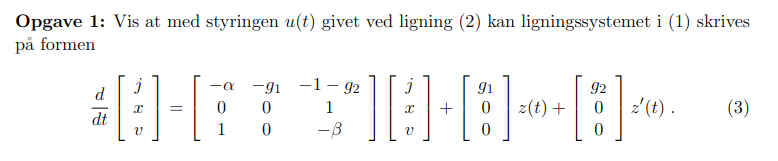

In [5]:
#Opgave 1
eq3 = eq1.subs(u,eq2.rhs)
eq3

⎡d       ⎤                                                               
⎢──(j(t))⎥                                                               
⎢dt      ⎥   ⎡                                 ⎛        d       ⎞       ⎤
⎢        ⎥   ⎢-α⋅j(t) + g₁⋅(-x(t) + z(t)) + g₂⋅⎜-v(t) + ──(z(t))⎟ - v(t)⎥
⎢d       ⎥   ⎢                                 ⎝        dt      ⎠       ⎥
⎢──(x(t))⎥ = ⎢                                                          ⎥
⎢dt      ⎥   ⎢                           v(t)                           ⎥
⎢        ⎥   ⎢                                                          ⎥
⎢d       ⎥   ⎣                      -β⋅v(t) + j(t)                      ⎦
⎢──(v(t))⎥                                                               
⎣dt      ⎦                                                               

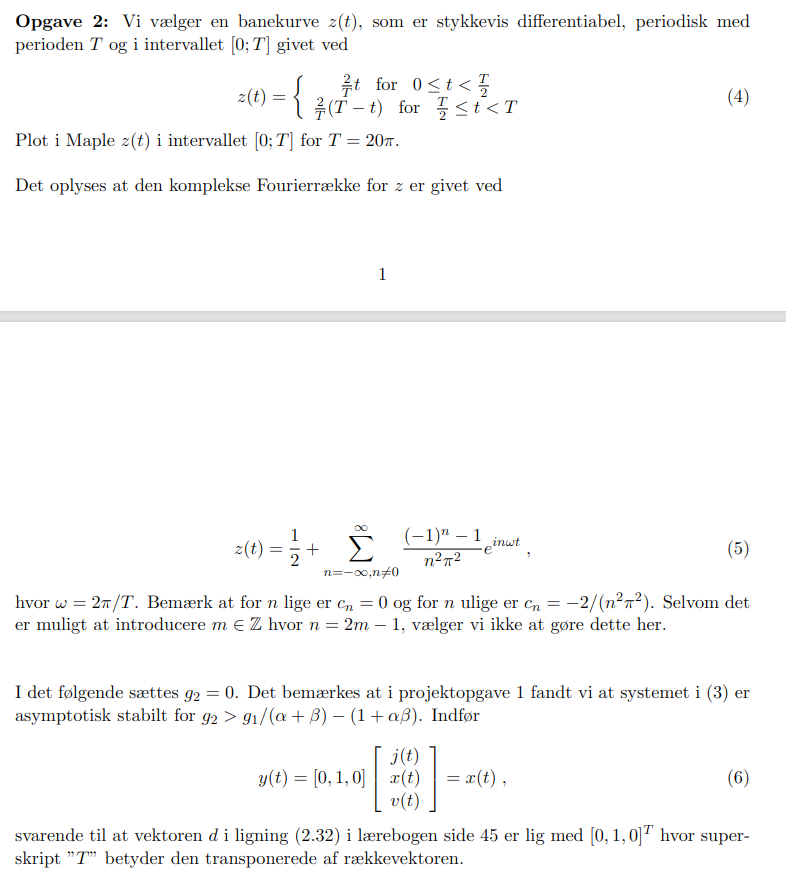

In [6]:
#Opgave 2
T = Symbol('T', real = True)
#z2 = Piecewise((2/T*t,t>=0),(2/T*t,t<T/2),(2/T*(T-t),t>=T/2),(2/T*(T-t),t<T))
eq4 = Eq(z,Piecewise((2/T*t,(0<=t)&(t<T/2)),(2/T*(T-t),(t>=T/2)&(t<T))))
eq4

       ⎧   2⋅t                     T
       ⎪   ───     for t ≥ 0 ∧ t < ─
       ⎪    T                      2
z(t) = ⎨                            
       ⎪2⋅(T - t)          T        
       ⎪─────────  for t ≥ ─ ∧ T > t
       ⎩    T              2        

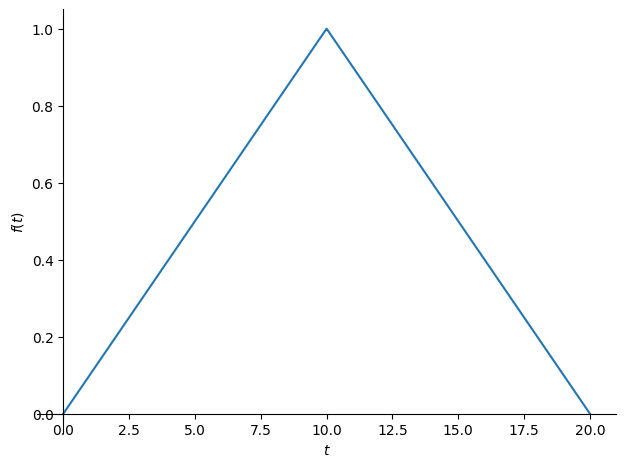

In [7]:
plot(eq4.subs(T,20).rhs,(t,0,20))

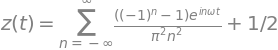

In [74]:
om = Symbol('omega', real = True)
eqom = Eq(om,2*pi/T)
n = Symbol ('n', integer = True)
eq5 = Eq(z,S(1)/2+ Sum(((-1)**n-1)/(n**2*pi**2)*exp(I*n*om*t),(n,-oo,oo)))
eq5

In [9]:
d = Matrix([0,1,0])
y=d.transpose()*a
y

[x(t)]

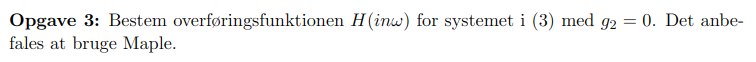

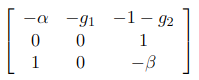

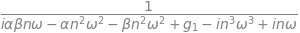

In [41]:
#Opgave 3
s = Symbol('s')
A3 = Matrix([[-al,-g1,-1-g2],[0,0,1],[1,0,-be]]).subs(g2,0)
H = (-d.transpose()*(A3-s*eye(3))**(-1)*b)[0]
Hc = H.subs(s,I*n*om).simplify()
Hc

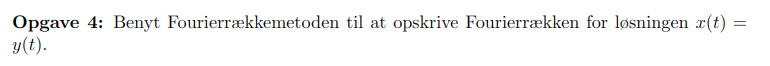

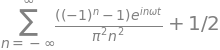

In [47]:
(eq5.rhs)

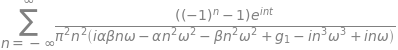

In [91]:
#Opgave 4
c = lambda n: S(1)/2 if n == 0 else (S(-1)**n-1)/(n**2*pi**2)
y4 = Sum(c(n)*Hc*exp(I*n*t),(n,-oo,oo))
y4

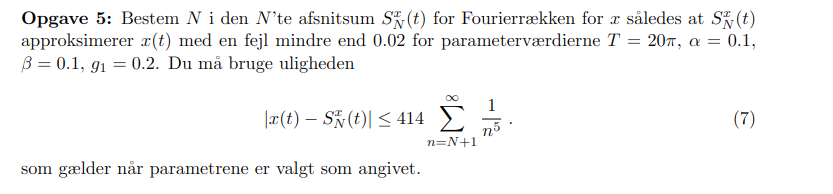

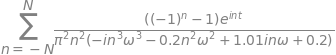

In [107]:
#Opgave 5
ep = 0.02
N = Symbol('N', integer = True)
SN = (Sum((c(n)*Hc*exp(I*n*t)).subs({T:20*pi,al:0.1,be:0.1,g1:0.2}),(n,-N,N)))
SN

In [108]:
SN.subs(N,4).doit()

nan

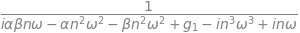

In [95]:
Hc